In [36]:
import sys
sys.path.insert(0, "../../")
from classes.calculators.lennardjones import LennardJones
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_collection_plotter import Atom_Collection_Plotter
from classes.optimizers.metropol import Metropol_new1 as Metropol
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [37]:
def random_inits(N, x_min=-4.0, x_max=4.0, y_min=-4.0, y_max=4.0):
    ns = np.random.rand(N,2)
    ns[:,0]*=(x_max-x_min)
    ns[:,0]+=x_min
    ns[:,1]*=(y_max-y_min)
    ns[:,1]+=y_min
    return ns

def create_atom_col(N_atoms, grid_size):
    atom_list = []
    init_pos = random_inits(N=N_atoms-1, x_min=grid_size[0], x_max=grid_size[1], y_min=grid_size[0], y_max=grid_size[1])
    init_pos_fixed = np.array([0.0,0.0])
    new_arr = np.insert(init_pos,0, init_pos_fixed).reshape(N_atoms, 2)
    for pos in new_arr:
        atom = Atom(pos)
        atom_list.append(atom)
    atom_col = Atom_Collection(atomlist=atom_list)
    atom_col.freeze_atoms(indices=[0])
    return atom_col

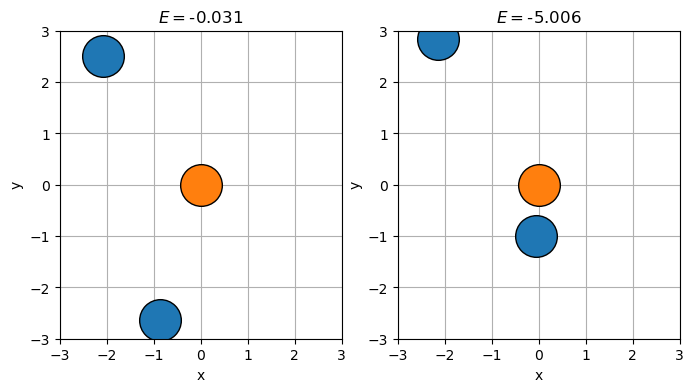

In [38]:
grid_size = [-3, 3]
fig, axs = plt.subplots(1,2,figsize=(8,4))
init_atom_col = create_atom_col(3, grid_size=grid_size)
init_atom_col.calculator = LennardJones()
optimizer = Metropol(atom_col=init_atom_col, T=0.15)
atom_plotter = Atom_Collection_Plotter(markersize=30)
optimizer.run_all_atoms(N_max=6000, start_quench=200, E_limit=-40.0, track=True)
optimizer.best_atom_col.calculator = LennardJones()
for ax, colls in zip(axs, [init_atom_col, optimizer.best_atom_col]):
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
    ax.set_xlim(grid_size)
    ax.set_ylim(grid_size)
    ax.set_title(rf"$E=${colls.get_potential_energy().round(3)}")
    atom_plotter(colls, ax=ax)

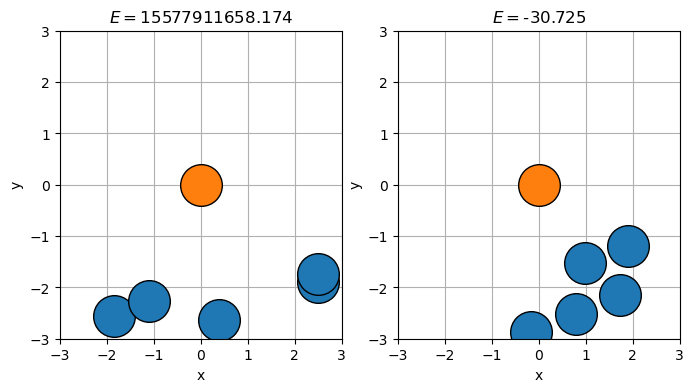

In [39]:
grid_size = [-3, 3]
fig, axs = plt.subplots(1,2,figsize=(8,4))
init_atom_col = create_atom_col(6, grid_size=grid_size)
init_atom_col.calculator = LennardJones()
optimizer = Metropol(atom_col=init_atom_col, T=0.15)
atom_plotter = Atom_Collection_Plotter(markersize=30)
optimizer.run_all_atoms(N_max=6000, start_quench=4000, E_limit=-40.0, track=True)
optimizer.best_atom_col.calculator = LennardJones()
for ax, colls in zip(axs, [init_atom_col, optimizer.best_atom_col]):
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
    ax.set_xlim(grid_size)
    ax.set_ylim(grid_size)
    ax.set_title(rf"$E=${colls.get_potential_energy().round(3)}")
    atom_plotter(colls, ax=ax)

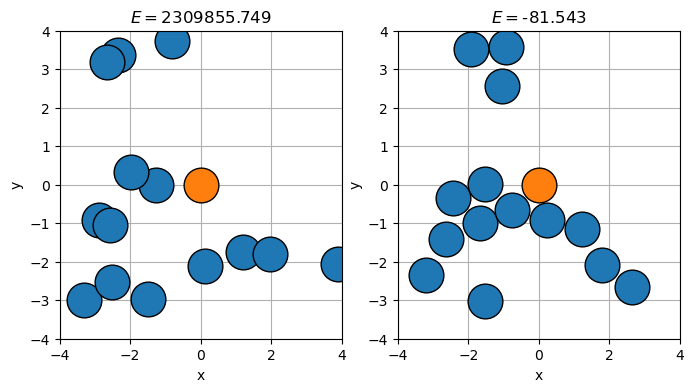

In [56]:
grid_size = [-4, 4]
fig, axs = plt.subplots(1,2,figsize=(8,4))
init_atom_col = create_atom_col(15, grid_size=grid_size)
init_atom_col.calculator = LennardJones()
optimizer = Metropol(atom_col=init_atom_col, T=0.15)
atom_plotter = Atom_Collection_Plotter(markersize=25)
optimizer.run_all_atoms(N_max=10000, start_quench=8000, E_limit=-500.0)
optimizer.best_atom_col.calculator = LennardJones()
for ax, colls in zip(axs, [init_atom_col, optimizer.best_atom_col]):
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()
    ax.set_xlim(grid_size)
    ax.set_ylim(grid_size)
    ax.set_title(rf"$E=${colls.get_potential_energy().round(3)}")
    atom_plotter(colls, ax=ax)